In [1]:
# Required Libraries
import numpy as np
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score, f1_score, precision_score, recall_score


# Random Seed for results reproduction
np.random.seed(7)

In [2]:
# Function to check if there are any categorical variables in featureset
def is_categorical(array_like):
    return array_like.dtype.name == 'category'

In [3]:
# Load the data with tab-separation
raw_data = pd.read_csv("./data/Dmel_matrix__pml.txt", delimiter="\t", header=None)

# Convert to CSV
raw_data.to_csv()

print("Dataset Loaded\n")
print(raw_data.head())

Dataset Loaded

           0   1   2   3   4   5   6   7   8   9   ...     20     21     22  \
0  Refseq_001  31  44   2   3   0   7  10   4   0  ...  0.010 -0.621 -0.616   
1  Refseq_002  13  22   0   2   0  13  21   2  16  ...  0.270  0.012  0.039   
2  Refseq_003  62  94   4  12   4   3   9   0   7  ...  0.779  0.490  0.321   
3  Refseq_004  11   8   2   2   2  53  93  27  35  ...  0.000  0.000  0.000   
4  Refseq_005  41  78   0   3   0   0   0   0   0  ... -0.526 -0.502 -0.597   

      23     24     25     26     27     28  29  
0 -0.808  0.051  0.514 -0.238 -1.558 -1.825   1  
1 -0.171  0.281 -0.079 -0.050  0.163 -0.124   1  
2 -0.089  0.407 -0.222 -0.193 -0.361 -0.521   1  
3  0.000  0.000  0.000  0.000  0.000  0.000   1  
4 -0.336 -0.644 -0.385 -0.395 -0.563 -0.421   1  

[5 rows x 30 columns]


In [4]:
# Check if data has missing values
print("Missing values in data: {}".format(data.isnull().sum().sum()))

Missing values in data: 0


In [5]:
# Capture the Dependent and Independent Variable
X = data.iloc[:, 1:-1].values  # Independent Varibale with 28 features
y = data.iloc[:, -1].values  # Dependent Variable with 2 classes

In [6]:
# Checking Categorical variables
print("Categorical Variables present: {}".format(is_categorical(X)))

Categorical Variables present: False


In [7]:
# Scale the Values
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

Explained variation per principal component: [0.21895339 0.19066294 0.13445163]


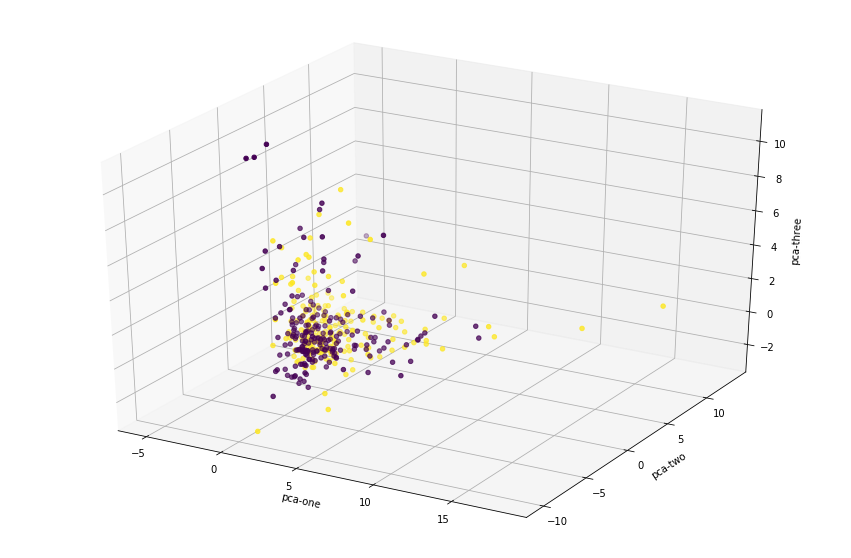

In [8]:
# Plot the data

# Will apply principle component analysis (PCA) for dimentionality reduction
pca = PCA(n_components=3)  # For 3 Dimenstions
pca_result = pca.fit_transform(X)
print('Explained variation per principal component: {}'.format(
    pca.explained_variance_ratio_))

# 3D Plot
ax = plt.figure(figsize=(15, 10)).gca(projection='3d')
ax.scatter(
    xs=pca_result[:, 0],
    ys=pca_result[:, 1],
    zs=pca_result[:, 2],
    c=y
    # cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [9]:
# Split the data in train_set and test_set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=seed)

In [10]:
# 1) Logistic Regression
classifier = LogisticRegression(random_state=seed)
print()
print("----------Training Logistic Regression----------")
print()
classifier.fit(X_train, y_train)

# Pridiciton of Testset
y_pred = classifier.predict(X_test)

# Confusion Matrix
acc_score = accuracy_score(y_test, y_pred)
apc = average_precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('{:<23}: {:>10.2f}'.format('Accuracy Score', acc_score), sep='')
print('{:<23}: {:>10.2f}'.format('Avarage Precision Score', apc), sep='')
print('{:<23}: {:>10.2f}'.format('f1 Score:', f1), sep='')
print('{:<23}: {:>10.2f}'.format('Precision Score:', ps), sep='')
print('{:<23}: {:>10.2f}'.format('Recall Score:', rs), sep='')
print()
print('Confusion Matrix: {}'.format(cm))
print()


----------Training Logistic Regression----------

Accuracy Score         :       0.64
Avarage Precision Score:       0.51
f1 Score:              :       0.63
Precision Score:       :       0.54
Recall Score:          :       0.76

Confusion Matrix: [[14 11]
 [ 4 13]]



/home/ibtihaj/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
# 2) k-NN
classifier = KNeighborsClassifier(n_neighbors=5)  # using 5 neighbors
print()
print("----------Training k-NN----------")
print()
classifier.fit(X_train, y_train)

# Pridiciton of Testset
y_pred = classifier.predict(X_test)

# Confusion Matrix
acc_score = accuracy_score(y_test, y_pred)
apc = average_precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('{:<23}: {:>10.2f}'.format('Accuracy Score', acc_score), sep='')
print('{:<23}: {:>10.2f}'.format('Avarage Precision Score', apc), sep='')
print('{:<23}: {:>10.2f}'.format('f1 Score:', f1), sep='')
print('{:<23}: {:>10.2f}'.format('Precision Score:', ps), sep='')
print('{:<23}: {:>10.2f}'.format('Recall Score:', rs), sep='')
print()
print('Confusion Matrix: {}'.format(cm))
print()


----------Training k-NN----------

Accuracy Score         :       0.43
Avarage Precision Score:       0.38
f1 Score:              :       0.40
Precision Score:       :       0.35
Recall Score:          :       0.47

Confusion Matrix: [[10 15]
 [ 9  8]]



In [12]:
# 3) Support Vector Mahcine (SVM)
classifier = SVC(random_state=seed)
print()
print("----------Training SVM----------")
print()
classifier.fit(X_train, y_train)

# Pridiciton of Testset
y_pred = classifier.predict(X_test)

# Confusion Matrix
acc_score = accuracy_score(y_test, y_pred)
apc = average_precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('{:<23}: {:>10.2f}'.format('Accuracy Score', acc_score), sep='')
print('{:<23}: {:>10.2f}'.format('Avarage Precision Score', apc), sep='')
print('{:<23}: {:>10.2f}'.format('f1 Score:', f1), sep='')
print('{:<23}: {:>10.2f}'.format('Precision Score:', ps), sep='')
print('{:<23}: {:>10.2f}'.format('Recall Score:', rs), sep='')
print()
print('Confusion Matrix: {}'.format(cm))
print()


----------Training SVM----------



/home/ibtihaj/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy Score         :       0.55
Avarage Precision Score:       0.44
f1 Score:              :       0.54
Precision Score:       :       0.46
Recall Score:          :       0.65

Confusion Matrix: [[12 13]
 [ 6 11]]



In [13]:
# 4) Decision Trees
classifier = DecisionTreeClassifier(random_state=seed)
print()
print("----------Training Decision Trees----------")
print()
classifier.fit(X_train, y_train)

# Pridiciton of Testset
y_pred = classifier.predict(X_test)

# Confusion Matrix
acc_score = accuracy_score(y_test, y_pred)
apc = average_precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('{:<23}: {:>10.2f}'.format('Accuracy Score', acc_score), sep='')
print('{:<23}: {:>10.2f}'.format('Avarage Precision Score', apc), sep='')
print('{:<23}: {:>10.2f}'.format('f1 Score:', f1), sep='')
print('{:<23}: {:>10.2f}'.format('Precision Score:', ps), sep='')
print('{:<23}: {:>10.2f}'.format('Recall Score:', rs), sep='')
print()
print('Confusion Matrix: {}'.format(cm))
print()


----------Training Decision Trees----------

Accuracy Score         :       0.55
Avarage Precision Score:       0.43
f1 Score:              :       0.51
Precision Score:       :       0.45
Recall Score:          :       0.59

Confusion Matrix: [[13 12]
 [ 7 10]]



In [14]:
# 5) Random Forest
classifier = RandomForestClassifier(random_state=0)
print()
print("----------Training Random Forest----------")
print()
classifier.fit(X_train, y_train)

# Pridiciton of Testset
y_pred = classifier.predict(X_test)

# Confusion Matrix
acc_score = accuracy_score(y_test, y_pred)
apc = average_precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('{:<23}: {:>10.2f}'.format('Accuracy Score', acc_score), sep='')
print('{:<23}: {:>10.2f}'.format('Avarage Precision Score', apc), sep='')
print('{:<23}: {:>10.2f}'.format('f1 Score:', f1), sep='')
print('{:<23}: {:>10.2f}'.format('Precision Score:', ps), sep='')
print('{:<23}: {:>10.2f}'.format('Recall Score:', rs), sep='')
print()
print('Confusion Matrix: {}'.format(cm))
print()


----------Training Random Forest----------



/home/ibtihaj/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy Score         :       0.45
Avarage Precision Score:       0.39
f1 Score:              :       0.41
Precision Score:       :       0.36
Recall Score:          :       0.47

Confusion Matrix: [[11 14]
 [ 9  8]]



In [15]:
# 6) Naive Bayes
classifier = GaussianNB()
print()
print("----------Training Naive Bayes----------")
print()
classifier.fit(X_train, y_train)

# Pridiciton of Testset
y_pred = classifier.predict(X_test)

# Confusion Matrix
acc_score = accuracy_score(y_test, y_pred)
apc = average_precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('{:<23}: {:>10.2f}'.format('Accuracy Score', acc_score), sep='')
print('{:<23}: {:>10.2f}'.format('Avarage Precision Score', apc), sep='')
print('{:<23}: {:>10.2f}'.format('f1 Score:', f1), sep='')
print('{:<23}: {:>10.2f}'.format('Precision Score:', ps), sep='')
print('{:<23}: {:>10.2f}'.format('Recall Score:', rs), sep='')
print()
print('Confusion Matrix: {}'.format(cm))
print()


----------Training Naive Bayes----------

Accuracy Score         :       0.38
Avarage Precision Score:       0.36
f1 Score:              :       0.24
Precision Score:       :       0.24
Recall Score:          :       0.24

Confusion Matrix: [[12 13]
 [13  4]]



In [16]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))

/home/ibtihaj/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ibtihaj/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ibtihaj/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ibtihaj/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ibtihaj/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/sklearn/

LR: 0.335795 (0.067810)
KNN: 0.352744 (0.071050)
SVM: 0.285593 (0.097935)
CART: 0.446207 (0.086545)


/home/ibtihaj/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ibtihaj/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ibtihaj/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ibtihaj/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

RF: 0.396570 (0.150847)
NB: 0.427563 (0.156480)


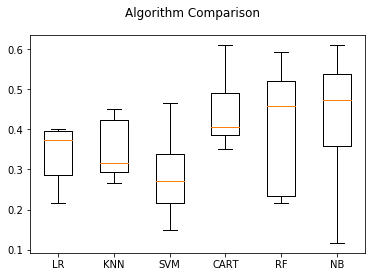

In [17]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=7, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('Result.png')

In [18]:
csv_dict = dict()

for name, result in zip(names, results):
    if name not in csv_dict.keys():
        stats = []
        stats.append(min(result))
        stats.append(statistics.median(result))
        stats.append(max(result))
        stats.append(statistics.variance(result))
        stats.append(statistics.stdev(result))
        
        csv_dict[name] = stats